In [1]:
# Description: This program predicts the price of Ferrari N.V. Stock 


In [4]:
# Import libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [8]:
# Import data
df = pd.read_csv('FerrariDataSet.csv')
# Show data
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-08,91.709999,91.919998,90.709999,91.849998,88.716469,489600
1,2017-06-09,91.639999,91.940002,89.160004,89.449997,86.398338,849200
2,2017-06-12,89.019997,89.089996,87.430000,87.750000,84.756348,1021900
3,2017-06-13,88.839996,88.989998,87.910004,88.190002,85.181335,586200
4,2017-06-14,88.720001,88.830002,87.889999,88.419998,85.403488,397400
...,...,...,...,...,...,...,...
1254,2022-06-01,192.009995,192.899994,187.759995,189.169998,189.169998,558400
1255,2022-06-02,190.899994,198.000000,190.776001,197.880005,197.880005,399400
1256,2022-06-03,192.610001,193.949997,189.434998,189.710007,189.710007,535700
1257,2022-06-06,192.600006,194.250000,191.460007,193.270004,193.270004,279600


In [13]:
# Show and store the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2022-06-07,189.399994,191.410004,187.919998,191.160004,191.160004,337000


In [14]:
# Get all the data except the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-08,91.709999,91.919998,90.709999,91.849998,88.716469,489600
1,2017-06-09,91.639999,91.940002,89.160004,89.449997,86.398338,849200
2,2017-06-12,89.019997,89.089996,87.430000,87.750000,84.756348,1021900
3,2017-06-13,88.839996,88.989998,87.910004,88.190002,85.181335,586200
4,2017-06-14,88.720001,88.830002,87.889999,88.419998,85.403488,397400
...,...,...,...,...,...,...,...
1253,2022-05-31,195.779999,196.699997,193.223007,194.970001,194.970001,461300
1254,2022-06-01,192.009995,192.899994,187.759995,189.169998,189.169998,558400
1255,2022-06-02,190.899994,198.000000,190.776001,197.880005,197.880005,399400
1256,2022-06-03,192.610001,193.949997,189.434998,189.710007,189.710007,535700


In [15]:
# Create empty list
days = list()
adj_close_prices = list()

In [16]:
# Get only the date & adjusted close prices
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [17]:
# Create independent data set (dates)
for day in df_days:
    days.append([int(day.split('-')[2])])
# Create dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))



In [21]:
# Create 3 prediction models
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma = 0.85)
rbf_svr.fit(days, adj_close_prices)





SVR(C=1000.0, gamma=0.85)

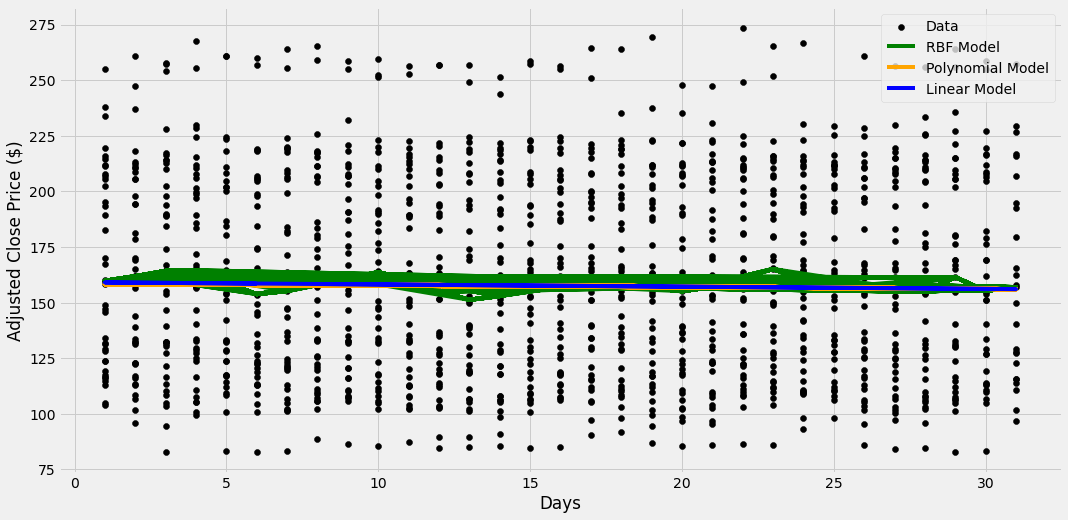

In [23]:
# Plot the models

plt.figure(figsize=(16,8))
plt.scatter (days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label= 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.show()



In [24]:
# Show the predicted price
day = [[8]]
print ('The RBF SVR predicted price:', rbf_svr.predict(day))
print ('The Linear SVR predicted price:', lin_svr.predict(day))
print ('The Polynomial SVR predicted price:', poly_svr.predict(day))

The RBF SVR predicted price: [157.92684125]
The Linear SVR predicted price: [158.3527937]
The Polynomial SVR predicted price: [158.09932557]


In [25]:
# Show the actual price
print('The actual price:', actual_price['Adj Close'])

The actual price: 1258    191.160004
Name: Adj Close, dtype: float64
